# Understanding Point Features Part (2):
We said there are many problem when we use matching template. Therefor we introduced image feautres (Point Features). In the first part we talked about Harris Corner Method and Good Features to Track. In this part we introduce some better methodes to determine the Point Features.

## SIFT Dectector: (Scale Invariant Feature Transform)
Each Point Feature will be represented by:
1. The center of each circle represents an interset point, a point that's ditinict enough to find in another image (with another scale or/and view)
2. The size of circle indicates something about the scale of the feature in other words all of the pixels that are in the circle around the feature are used to descirbe it.
      * Small Features: leaf or Small corner of balkon or windows  
      * large Features: they encompass the whole corner of a building
3. The orientation of the Feature in the image which says something about how that pattern of the pixels is oriented within the image. 

If we rotate the camera or we take the image from too widely distant then the size of circle and the orientation of the feature will be chnaged. The great advantage of the SIFT feature is that it will aloow us to match feature betwwen two very different images.

SIFT feature has also a **descriptor**. We can describe the similarity between these two scenses simply by comparing thier to descriptive vecotre and typically that done in Euclidean sense. 


## SURF Detector: (Speeded Up Robust Features)
It can find unique corner Features within the scene. The Features in the feature vector are ordered  from the most distinctive feature to the least one.  
Next we find the matching pairs between those two scenes.

** Note: The SIFT & SURF algorithms are patented by their respective creators, and while they are free to use in academic and research settings, you should technically be obtaining a license/permission from the creators if you are using them in a commercial (i.e. for-profit) application.**

** Note: In OpenCV 3.0 SURF and SIFT are not more availabe. Therefore I used Matlab MAchine Vision Toolbox to implement the both. ** 

```Matlb
%% Read The image
>> im1 = imread('buildig2-1.png')
>> im2 = imread('buildig2-2.png')
>> idisp({im1,im2})
```
![](images/Building2View.png)
```Matlb
>> f1(1:200).plot('wd')
>> # USe the SURF Detector to find the points features
>> f1 = isurf(im1)
4034 corners found (0.4%),  4034 corner features saved
>> idisp(im1)
>> f1(1:200).plot('wd')
```
![](images/SURFFeatureIim1.png)

```Matlb
>> f2 = isurf(im2)
3882 corners found (0.4%),  3882 corner features saved
```
```Matlb
%% The match method
>> m = f1.match(f2)
2017 corresponding points (listing suppressed)
%% Then we can use the method m.p to find the coordinates of matching pairs
>> m.p;
>> idisp({im1,im2})
>> m.subset(10).plot('w')
```
![](images/MatchPairs.png)


## Fast Detector: (The Features from Accelerated Segment Tes)
We saw several feature detectors and many of them are really good. But when looking from a real-time application point of view, they are not fast enough.

The FAST algorithm works in a clever way; it draws a circle around including 16 pixels. It then marks each pixel brighter or darker than a particular threshold compared to the center of the circle. A corner is defined by identifying a number of contiguous pixels marked as brighter or darker.

### The Algorithm:
1. Select a pixel p in the image which is to be identified as an interest point or not. Let its intensity be I_p.
2. Select appropriate threshold value t.
3. Consider a circle of 16 pixels around the pixel under test. 
4. Now the pixel p is a corner if there exists a set of n contiguous pixels in the circle (of 16 pixels) which are all brighter than $I_p + t$, or all darker than $I_p − t$. (Shown as white dash lines in the above image). n was chosen to be 12.

![](images/fast_speedtest.jpg)

10
Number of keypoints Detected:  2588


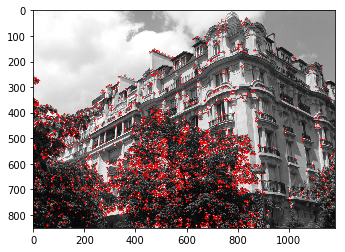

In [11]:
import cv2
import numpy as np
# import cv2.cv as cv
%matplotlib inline
import matplotlib.pyplot as plt


image = cv2.imread('images/building2-1.png')
image_out = image.copy()
gray = image_out

# Create FAST Detector object

fast = cv2.FastFeatureDetector_create()
print(fast.getThreshold())
fast.setThreshold(100)

# Obtain Key points, by default non max suppression is On
# to turn off set fast.setBool('nonmaxSuppression', False)
keypoints = fast.detect(gray, None)
print ("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
cv2.drawKeypoints(image, keypoints,image_out , flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,color=(255,0,0))
plt.imshow(image_out)
plt.show()

## BRIEF (Binary Robust Independent Elementary Features)
This algorithm is not a feature detection algorithm, but a descriptor. detectAndCompute function. SIFT and SURF These functions operate two different steps: 
* detection: The result of detection is a set of keypoints.
* computation: The result of the computation is the descriptor

This means that the OpenCV's SIFT and SURF classes are both detectors and descriptors.

Keypoint descriptors are a representation of the image that serves as the gateway to feature matching because you can compare the keypoint descriptors of two images and find commonalities.

BRIEF is one of the fastest descriptors currently available. The theory behind BRIEF is actually quite complicated, but suffice to say that BRIEF adopts a series of optimizations that make it a very good choice for feature matching.

Number of keypoints Detected:  8735


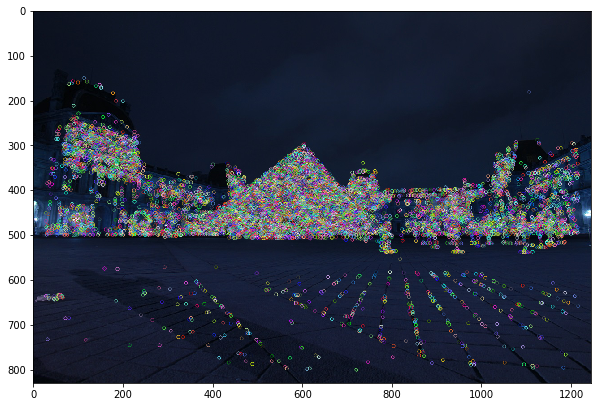

In [27]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
image2 = image.copy() 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create FAST detector object
fast = cv2.FastFeatureDetector_create()

# Create BRIEF extractor object
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Determine key points
keypoints = fast.detect(gray, None)

# Obtain descriptors and new final keypoints using BRIEF
keypoints, descriptors = brief.compute(gray, keypoints)
print ("Number of keypoints Detected: ", len(keypoints))

# Draw rich keypoints on input image
cv2.drawKeypoints(image, keypoints, image2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
                                    
plt.figure(figsize=(10,7))
plt.imshow(image2)
plt.show()

## Feature matching with ORB
Now that we have a general idea of what FAST and BRIEF are, we can understand why the team behind ORB chose these two algorithms as a foundation for ORB.

The team behind ORB aim at achieving the following results:
* The addition of a fast and accurate orientation component to FAST
* The efficient computation of oriented BRIEF features
* Analysis of variance and correlation of oriented BRIEF features
* A learning method to decorrelate BRIEF features under rotational invariance, leading to better performance in nearest-neighbor applications.

ORB aims at optimizing and speeding up operations, including the very important step of utilizing BRIEF in a rotation-aware fashion so that matching is improved even in situations where a training image has a very different rotation to the query image.

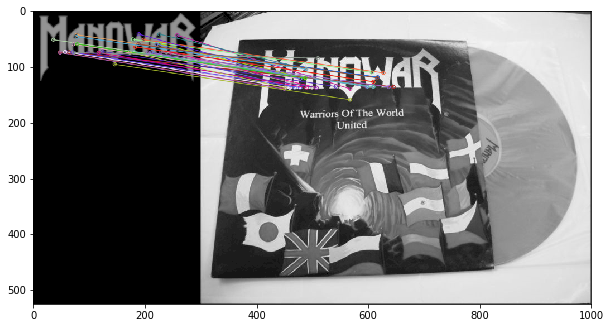

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('images/manowar_logo.png',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/manowar_single.png', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1,kp1,img2,kp2, matches[:40], img2,flags=2)
plt.figure(figsize=(10,7))
plt.imshow(img3)
plt.show()